In [1]:
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
import numpy as np
no = np.random.randint(low=0, high=59999, size=1)[0]
no

18081

In [5]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

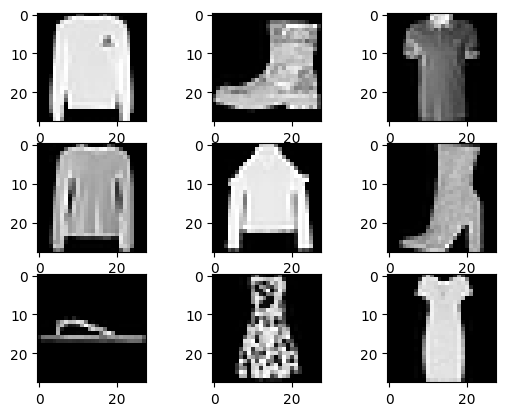

In [6]:
for i in range(9):
	# define subplot
	no = np.random.randint(low=0, high=59999, size=1)[0]
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[no], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
tf.random.set_seed( seed = 2024 )
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28x28 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 512)               1384960   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               102600    
                                                        

In [11]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto',restore_best_weights=True)
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['acc'])

In [12]:
history = model.fit(x=X_train,y=y_train,
                              validation_data=(X_test,y_test),
                              steps_per_epoch=50,epochs=100,
                              validation_steps=50,
                              verbose=2, callbacks=[monitor])

Epoch 1/100
50/50 - 82s - loss: 8.6489 - acc: 0.6779 - val_loss: 0.5508 - val_acc: 0.8058 - 82s/epoch - 2s/step
Epoch 2/100
50/50 - 79s - loss: 0.7173 - acc: 0.7815 - val_loss: 0.4119 - val_acc: 0.8521 - 79s/epoch - 2s/step
Epoch 3/100
50/50 - 55s - loss: 0.4329 - acc: 0.8438 - val_loss: 0.3713 - val_acc: 0.8611 - 55s/epoch - 1s/step
Epoch 4/100
50/50 - 34s - loss: 0.3321 - acc: 0.8771 - val_loss: 0.3698 - val_acc: 0.8610 - 34s/epoch - 685ms/step
Epoch 5/100
50/50 - 31s - loss: 0.2802 - acc: 0.8951 - val_loss: 0.3107 - val_acc: 0.8881 - 31s/epoch - 622ms/step
Epoch 6/100
50/50 - 36s - loss: 0.2420 - acc: 0.9086 - val_loss: 0.3385 - val_acc: 0.8820 - 36s/epoch - 722ms/step
Epoch 7/100
50/50 - 32s - loss: 0.2118 - acc: 0.9196 - val_loss: 0.3309 - val_acc: 0.8883 - 32s/epoch - 639ms/step
Epoch 8/100
50/50 - 32s - loss: 0.1837 - acc: 0.9294 - val_loss: 0.3048 - val_acc: 0.8997 - 32s/epoch - 644ms/step
Epoch 9/100
50/50 - 31s - loss: 0.1618 - acc: 0.9380 - val_loss: 0.3294 - val_acc: 0.8996

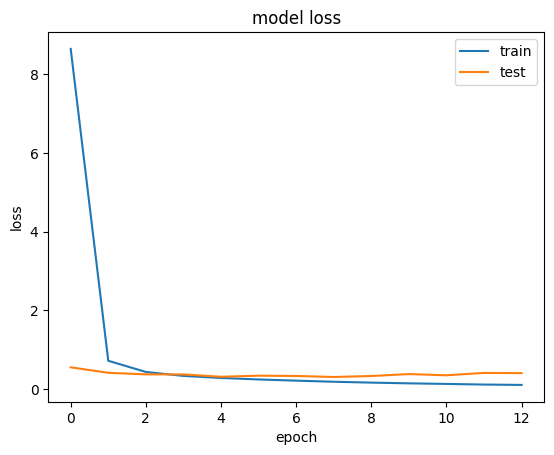

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.3047748804092407
Test accuracy: 0.8996999859809875
